In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

classes_original = ['DAPT', 'WT', 'her1;her7', 'tbx6']
classes_shuffled = ['WT', 'tbx6', 'DAPT', 'her1;her7']
def plot_matrix(conf_matrix, xlabel, ylabel, title, shuffle = 0):
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s="{average:.2f}".format(average = conf_matrix[i, j]), va='center', ha='center', size='xx-large')
    if(shuffle == 0):
        plt.xticks(np.arange(4), classes_original, fontsize = 15)
        plt.yticks(np.arange(4), classes_original, fontsize = 15)
    if(shuffle == 1):
        plt.xticks(np.arange(4), classes_shuffled, fontsize = 15)
        plt.yticks(np.arange(4), classes_shuffled, fontsize = 15) 
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.title(title, fontsize=18)
    plt.show()
    
def plot_compiled_matrix(avg_matrix, deviation_matrix, xlabel, ylabel, title, shuffle):
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(avg_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(avg_matrix.shape[0]):
        for j in range(avg_matrix.shape[1]):
            ax.text(x=j, y=i,s="{average:.2f}±{deviation:.2f}".format(average = avg_matrix[i, j], deviation = deviation_matrix[i,j]), va='center', ha='center', size='xx-large')
    if(shuffle == 0):
        plt.xticks(np.arange(4), classes_original, fontsize = 15)
        plt.yticks(np.arange(4), classes_original, fontsize = 15)
    if(shuffle == 1):
        plt.xticks(np.arange(4), classes_shuffled, fontsize = 15)
        plt.yticks(np.arange(4), classes_shuffled, fontsize = 15) 
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.title(title, fontsize=18)
    plt.show()

def load_matrix(name, shuffle = 0):
    df = pd.read_excel(name, header = None, names = ["DAPT", "WT", "her1;her7", "tbx6"])
    if(shuffle == 1):
        df = df.iloc[[1,3,0,2],[1,3,0,2]]
    return df.to_numpy()


def calculate_average_matrix(matrices):
    avg = np.mean(matrices, axis = 0)
    dev = np.std(matrices, axis = 0)
    return avg, dev

def calculate_accuracy(matrices):
    #this function returns accuracy and standard deviation of the accuracy for confusion matrices
    #it assumes that data is balanced (acc = sum(diag)/n_classes)
    avg = np.empty(matrices.shape[0])
    for i, matrix in enumerate(matrices):
        avg[i] = np.trace(matrix)/4
    
    return np.mean(avg), np.std(avg)
        
    



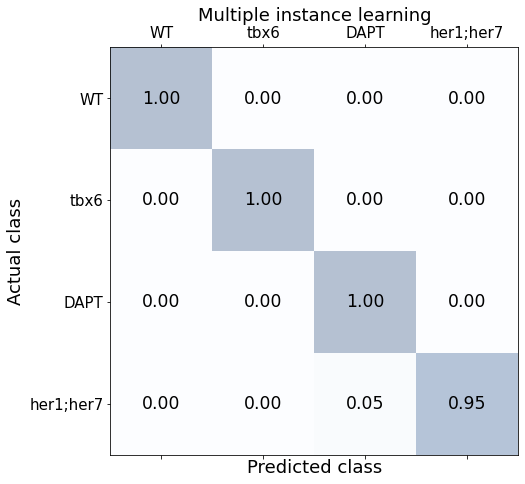

In [2]:
#ML
cm1 = load_matrix(r'figure_3\mil_confusion_matrix\mil_run_1.xlsx', shuffle = 1)
plot_matrix(cm1, 'Predicted class', 'Actual class', 'Multiple instance learning', shuffle = 1)


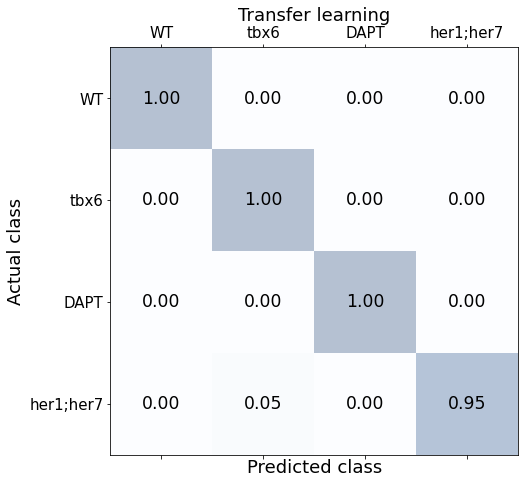

(0.9875000000000002, 1.1102230246251565e-16)


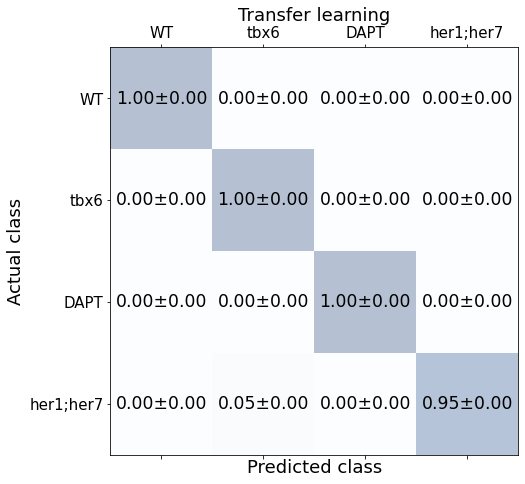

In [3]:
#Regular classifier.
shuffle = 1

cm1 = load_matrix(r'figure_1\regular_classifier\regular_classifier.xlsx', shuffle)
cm2 = cm1
cm3 = cm1
plot_matrix(cm1, 'Predicted class', 'Actual class', 'Transfer learning', shuffle)
matrices = np.array([cm1, cm2, cm3])

avg, dev = calculate_average_matrix(matrices)
acc = calculate_accuracy(matrices)
print(acc)
plot_compiled_matrix(avg, dev, 'Predicted class', 'Actual class', 'Transfer learning', shuffle)



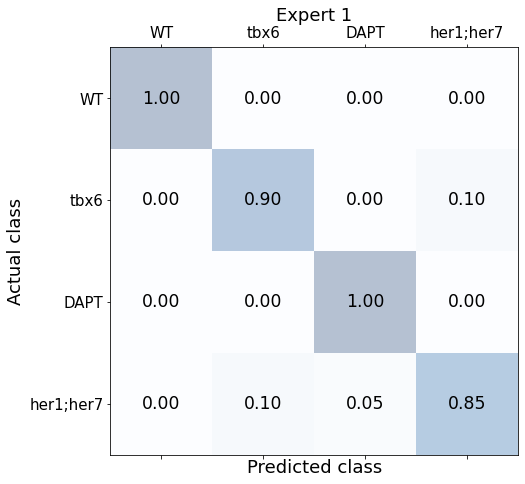

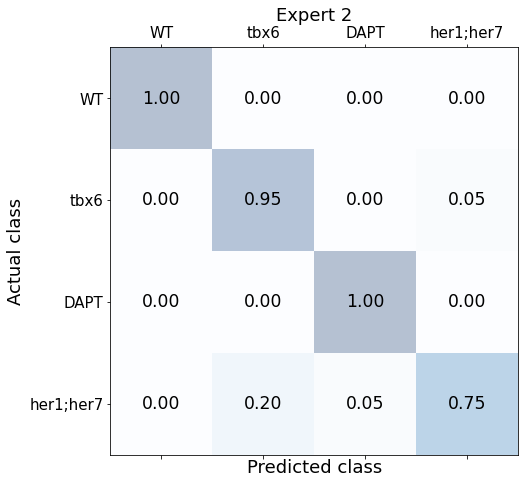

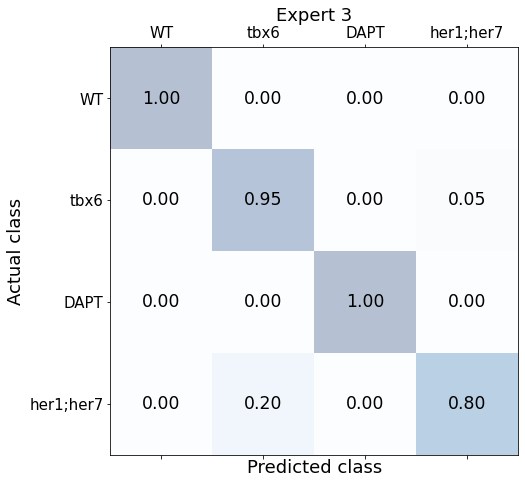

(0.9333333333333332, 0.005892556509887875)


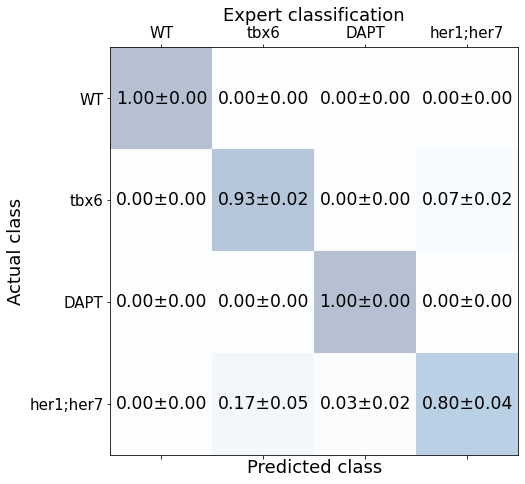

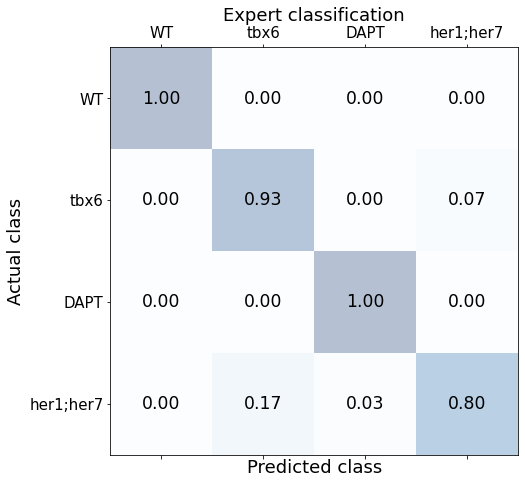

In [4]:
#Human classification
shuffle = 1
cm1 = load_matrix(r'figure_1\classification_by_humans\chloej.xlsx', shuffle)
cm2 = load_matrix(r'figure_1\classification_by_humans\ov.xlsx', shuffle)
cm3 = load_matrix(r'figure_1\classification_by_humans\sanni.xlsx', shuffle)
matrices = np.array([cm1, cm2, cm3])

plot_matrix(cm1, 'Predicted class', 'Actual class', 'Expert 1', shuffle) #Chloe
plot_matrix(cm2, 'Predicted class', 'Actual class', 'Expert 2', shuffle) #OV
plot_matrix(cm3, 'Predicted class', 'Actual class', 'Expert 3', shuffle) #Sanni

avg, dev = calculate_average_matrix(matrices)
acc = calculate_accuracy(matrices)
print(acc)
plot_compiled_matrix(avg, dev, 'Predicted class', 'Actual class', 'Expert classification', shuffle)
plot_matrix(avg, 'Predicted class', 'Actual class', 'Expert classification', shuffle)

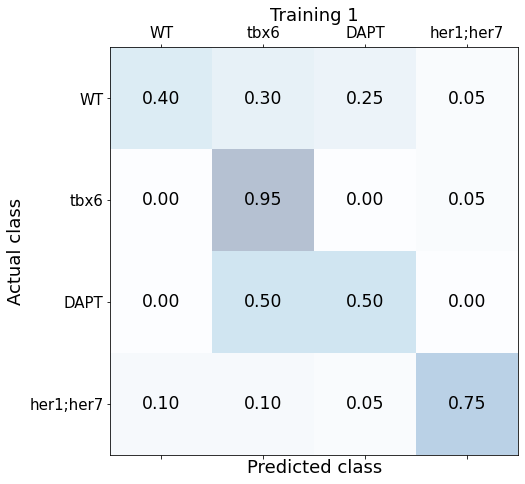

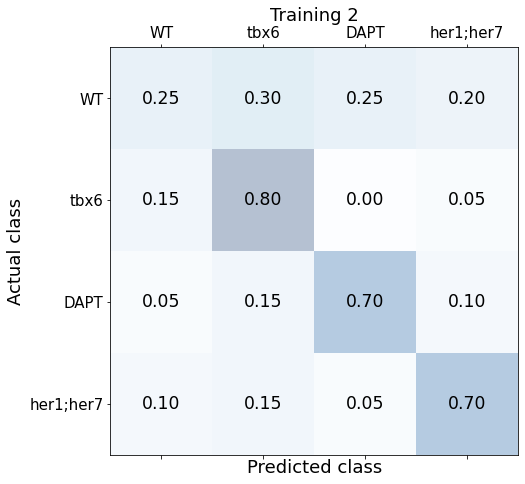

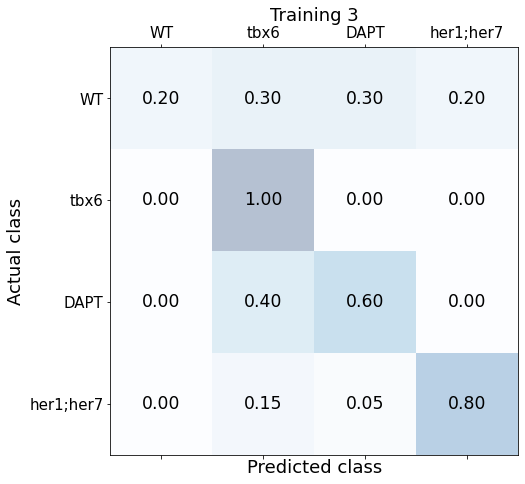

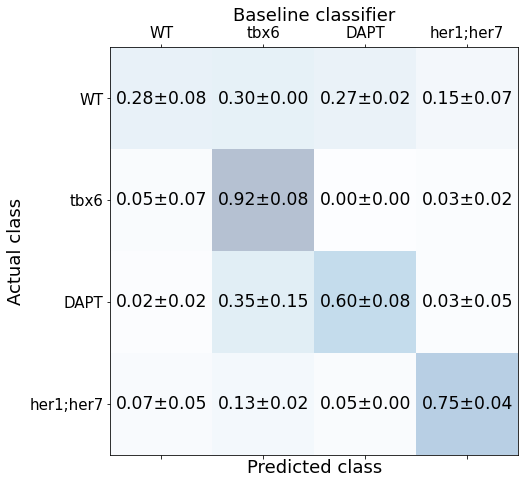

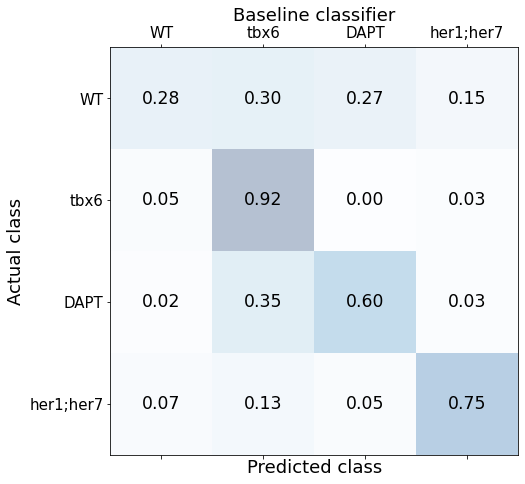

In [6]:
#Baseline classifier
shuffle = 1
cm1 = load_matrix(r'figure_1\baseline_classifier\baseline_matrix_training_1.xlsx', shuffle)
cm2 = load_matrix(r'figure_1\baseline_classifier\baseline_matrix_training_2.xlsx', shuffle)
cm3 = load_matrix(r'figure_1\baseline_classifier\baseline_matrix_training_3.xlsx', shuffle)
matrices = np.array([cm1, cm2, cm3])

plot_matrix(cm1, 'Predicted class', 'Actual class', 'Training 1', shuffle)
plot_matrix(cm2, 'Predicted class', 'Actual class', 'Training 2', shuffle)
plot_matrix(cm3, 'Predicted class', 'Actual class', 'Training 3', shuffle)

avg, dev = calculate_average_matrix(matrices)
acc, acc_std = calculate_accuracy(matrices)

plot_compiled_matrix(avg, dev, 'Predicted class', 'Actual class', 'Baseline classifier', shuffle)
plot_matrix(avg, 'Predicted class', 'Actual class', 'Baseline classifier', shuffle)